<a href="https://colab.research.google.com/github/juansevecchi9/gasoline_efficiency_predictor/blob/main/Gas_efficiency_prediction_(regression_template_2_0).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Use seaborn for pairplot

!pip install -q seaborn

In [ ]:
# Import libraries

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout

from keras import regularizers

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

print(tf.__version__)

2.8.2


In [ ]:
# Get dataset paths

dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

40960/30286 [========================================] - 0s 2us/step


'/root/.keras/datasets/auto-mpg.data'

In [ ]:
# Read dataset

column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']


df = pd.read_csv(dataset_path, names = column_names, na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)


df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [ ]:
# Check for na values and leave them out
df.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
#One hot encoding for origin label
origin = df.iloc[:,7]
print(origin)


0      1
1      1
2      1
3      1
4      1
      ..
393    1
394    2
395    1
396    1
397    1
Name: Origin, Length: 392, dtype: int64


In [ ]:
df['USA'] = (origin == 1)*1.0
df['Europe'] = (origin == 2)*1.0
df['Japan'] = (origin == 3)*1.0
df.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1,1.0,0.0,0.0


In [ ]:
# Separate between input and output data and create training, validation and testing sets.

X = df.iloc[:, 1:]
y = df.iloc[:, 0]

print(X)
print(y)

X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X, y, test_size=0.2)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

     Cylinders  Displacement  Horsepower  Weight  Acceleration  Model Year  \
0            8         307.0       130.0  3504.0          12.0          70   
1            8         350.0       165.0  3693.0          11.5          70   
2            8         318.0       150.0  3436.0          11.0          70   
3            8         304.0       150.0  3433.0          12.0          70   
4            8         302.0       140.0  3449.0          10.5          70   
..         ...           ...         ...     ...           ...         ...   
393          4         140.0        86.0  2790.0          15.6          82   
394          4          97.0        52.0  2130.0          24.6          82   
395          4         135.0        84.0  2295.0          11.6          82   
396          4         120.0        79.0  2625.0          18.6          82   
397          4         119.0        82.0  2720.0          19.4          82   

     Origin  USA  Europe  Japan  
0         1  1.0     0.0    0

In [ ]:
# Get some stats from the training data

train_stats_x = X_train.describe()
train_stats_x = train_stats_x.transpose()
train_stats_x

,count,mean,std,min,25%,50%,75%,max
Cylinders,313.0,5.507987,1.730412,3.0,4.0,4.0,8.0,8.0
Displacement,313.0,198.226837,105.612179,68.0,107.0,151.0,302.0,455.0
Horsepower,313.0,105.632588,38.774362,46.0,76.0,95.0,130.0,230.0
Weight,313.0,3011.348243,860.080820,1613.0,2255.0,2868.0,3630.0,5140.0
Acceleration,313.0,15.535144,2.820469,8.0,13.7,15.5,17.2,24.8
Model Year,313.0,75.942492,3.714561,70.0,73.0,76.0,79.0,82.0
Origin,313.0,1.568690,0.806172,1.0,1.0,1.0,2.0,3.0
USA,313.0,0.632588,0.482872,0.0,0.0,1.0,1.0,1.0
Europe,313.0,0.166134,0.372797,0.0,0.0,0.0,0.0,1.0
Japan,313.0,0.201278,0.401597,0.0,0.0,0.0,0.0,1.0


In [ ]:


train_stats_y = Y_train.describe()
train_stats_y = train_stats_y.transpose()
train_stats_y

count    313.000000
mean      23.224281
std        7.711026
min        9.000000
25%       17.000000
50%       22.000000
75%       28.400000
max       44.600000
Name: MPG, dtype: float64

In [ ]:

# Create a function to normalize input and output data

def norm_X(x):
  return (x - train_stats_x['mean']) / train_stats_x['std']


  
normed_train_data_X = norm_X(X_train)
normed_test_data_X = norm_X(X_val)



normed_train_data_X

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,USA,Europe,Japan
145,-0.871461,-1.091037,-1.151085,-1.172388,1.228468,-0.522940,1.775439,-1.310053,-0.445642,1.988863
282,-0.871461,-0.551327,-0.454749,-0.141089,0.625732,0.823114,-0.705420,0.760889,-0.445642,-0.501193
203,-0.871461,-0.958477,-0.893183,-1.379345,-1.182479,0.015482,0.535009,-1.310053,2.236782,-0.501193
164,0.284333,0.310316,0.112637,0.032150,-0.189736,-0.253729,-0.705420,0.760889,-0.445642,-0.501193
396,-0.871461,-0.740699,-0.686861,-0.449200,1.086648,1.630747,-0.705420,0.760889,-0.445642,-0.501193
...,...,...,...,...,...,...,...,...,...,...
122,-0.871461,-0.731230,0.112637,-0.408506,-0.544287,-0.792151,0.535009,-1.310053,2.236782,-0.501193
59,-0.871461,-0.958477,-1.331617,-0.880555,2.823948,-1.061361,0.535009,-1.310053,2.236782,-0.501193
272,-0.871461,-0.447172,-0.532119,-0.181783,0.732097,0.553903,-0.705420,0.760889,-0.445642,-0.501193
105,1.440127,1.531766,1.660051,1.909881,-0.898838,-0.792151,-0.705420,0.760889,-0.445642,-0.501193


In [ ]:
def norm_y(y):
  return (y - train_stats_y['mean']) / train_stats_y['std']
normed_train_data_y = norm_y(Y_train)
normed_test_data_y = norm_y(Y_val)


normed_train_data_y

145    1.138074
282   -0.119865
203    0.813863
164   -0.288455
396    0.619336
         ...   
122    0.100599
59    -0.029086
272    0.074662
105   -1.325930
249   -0.431108
Name: MPG, Length: 313, dtype: float64

In [ ]:
# Model (3 layers with dropout to avoid overfitting)


model = keras.Sequential([
  layers.Dense(64, activation='relu', input_shape=[len(X_train.keys())]),
  Dropout(0.2),
  layers.Dense(64, activation='relu'),
  Dropout(0.2),
  layers.Dense(1)
  ])

optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])


In [ ]:
# Training

hist = model.fit(normed_train_data_X, normed_train_data_y,
          batch_size=32, epochs=100,
          validation_data=(normed_test_data_X, normed_test_data_y))

Epoch 1/100
10/10 [==============================] - 2s 29ms/step - loss: 0.5574 - mae: 0.5897 - mse: 0.5574 - val_loss: 0.2647 - val_mae: 0.3919 - val_mse: 0.2647
Epoch 2/100
10/10 [==============================] - 0s 6ms/step - loss: 0.3132 - mae: 0.4298 - mse: 0.3132 - val_loss: 0.2459 - val_mae: 0.3698 - val_mse: 0.2459
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 0.2352 - mae: 0.3717 - mse: 0.2352 - val_loss: 0.2099 - val_mae: 0.3413 - val_mse: 0.2099
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 0.2534 - mae: 0.3883 - mse: 0.2534 - val_loss: 0.2021 - val_mae: 0.3327 - val_mse: 0.2021
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 0.2492 - mae: 0.3721 - mse: 0.2492 - val_loss: 0.1762 - val_mae: 0.3169 - val_mse: 0.1762
Epoch 6/100
10/10 [==============================] - 0s 6ms/step - loss: 0.2265 - mae: 0.3569 - mse: 0.2265 - val_loss: 0.1813 - val_mae: 0.3313 - val_mse: 0.1813
Epoch 7/100
10/10 [==

In [ ]:
# Quick predictions

example_batch = normed_train_data_X[:10]
example_result = model.predict(example_batch)
example_result

array([[ 1.017335  ],
       [ 0.0764168 ],
       [ 0.95015967],
       [-0.42627275],
       [ 0.8331523 ],
       [-0.0156454 ],
       [ 1.4854265 ],
       [-0.80085194],
       [-0.35448527],
       [-0.5422351 ]], dtype=float32)

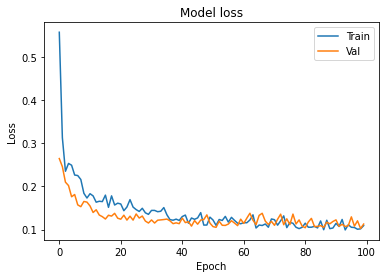

In [ ]:
# Loss chart

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

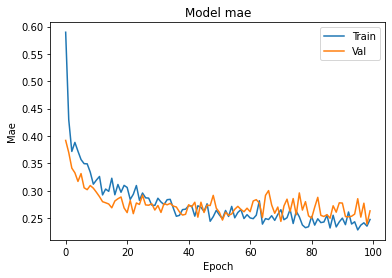

In [ ]:
# Mae chart

plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.title('Model mae')
plt.ylabel('Mae')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

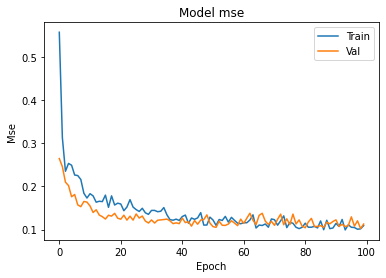

In [ ]:
# Mse chart

plt.plot(hist.history['mse'])
plt.plot(hist.history['val_mse'])
plt.title('Model mse')
plt.ylabel('Mse')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

(11.435, 45.864999999999995, 12.572696161270141, 47.00269616127014)

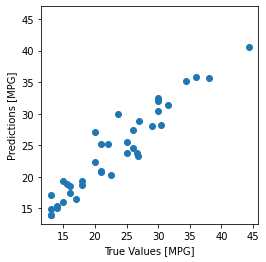

In [ ]:
# Opposite function to denormalize data and print some predictions 

def denorm(x):
  return (x *  train_stats_y['std']) +  train_stats_y['mean']






test_predictions = model.predict(normed_test_data_X).flatten()

plt.scatter(denorm(normed_test_data_y), denorm(test_predictions) )
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')



In [ ]:
from pandas.core.common import standardize_mapping
